Merged wave file.

There are zeros between the concatenated trials. So, find the zeros to find the trial boundary.

|117959--trial 0--174597| |186420--trial 1--250420|  |258133--trial 2--322130|  |333954--trial 3--397953|  |406690--trial 4--470691|

|482001--trial 5--546000| |553712--trial 6--617710|   |626450--trial 7--690449|  |698674--trial 8--end|

In [1]:
from dSPEECH.config import *
import matplotlib.pyplot as plt

pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [9]:
from scipy.io import wavfile

folder=data_dir+'evaluation_matrix/dataset6/'
filename=folder+'JNE_16_3_036019_suppdata.wav'
sf,audio=wavfile.read(filename)

C:\Users\xiaowu\AppData\Local\Temp\ipykernel_31456\893237188.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf,audio=wavfile.read(filename)


In [3]:
trial_boundary=[[117959,174597],[186420,250420],[258133,322130],[333954,397953],[406690,470691],[482001,546000],[553712,617710],[626450,690449],[698674,len(audio)]]
trial_lens=[t[1]-t[0] for t in trial_boundary]

In [4]:
trial_lens # len of first trial is strange, remove it from further analysis.

[56638, 64000, 63997, 63999, 64001, 63999, 63998, 63999, 64000]

In [5]:
trial_lens=trial_lens[1:]

In [6]:
trial_lists=[]
for t in trial_boundary[1:]:
    start=t[0]
    end=t[1]
    trial_lists.append(audio[start:end])

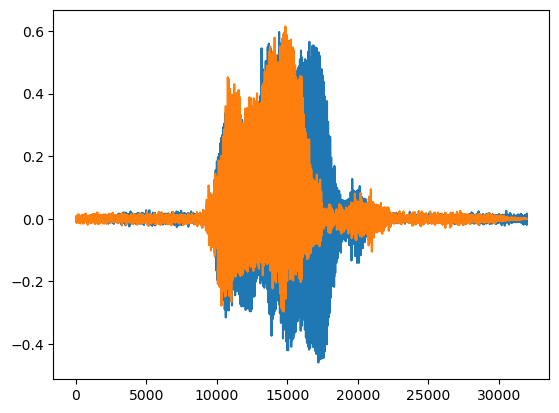

In [8]:
fig,ax=plt.subplots()
ax.plot(trial_lists[0][:int(trial_lens[0]/2)])
ax.plot(trial_lists[0][int(trial_lens[0]/2):]) # shift down to compare

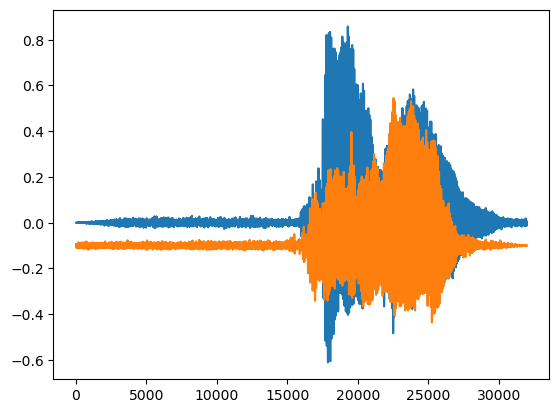

In [337]:
fig,ax=plt.subplots()
index=1
ax.plot(trial_lists[index][:int(trial_lens[index]/2)])
ax.plot(trial_lists[index][int(trial_lens[index]/2):]-0.1)

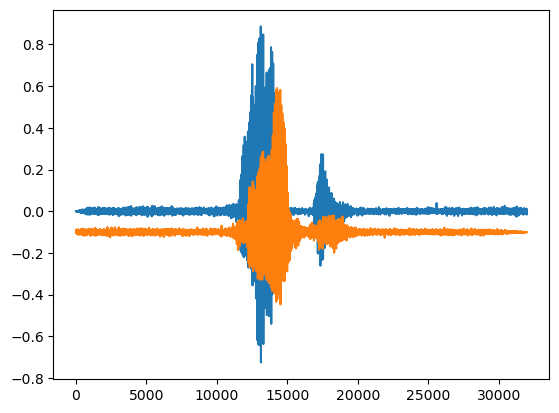

In [336]:
fig,ax=plt.subplots()
index=2
ax.plot(trial_lists[index][:int(trial_lens[index]/2)])
ax.plot(trial_lists[index][int(trial_lens[index]/2):]-0.1)

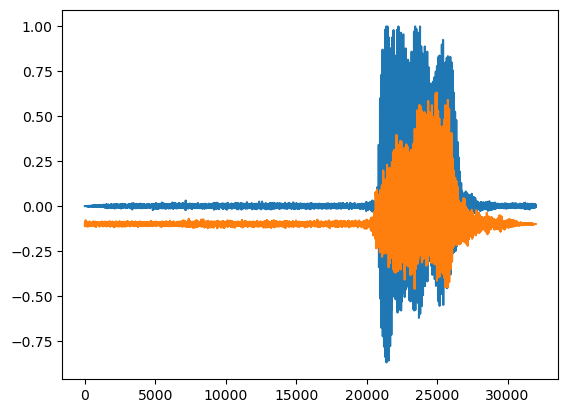

In [335]:
fig,ax=plt.subplots()
index=3
ax.plot(trial_lists[index][:int(trial_lens[index]/2)])
ax.plot(trial_lists[index][int(trial_lens[index]/2):]-0.1)

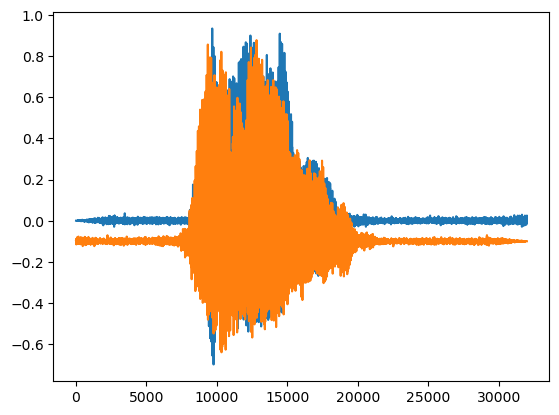

In [334]:
fig,ax=plt.subplots()
index=4
ax.plot(trial_lists[index][:int(trial_lens[index]/2)])
ax.plot(trial_lists[index][int(trial_lens[index]/2):]-0.1)

In [12]:
import soundfile
for i,trial in enumerate(trial_lists):
    half_trial_len=int(len(trial)/2)
    target=trial[:half_trial_len]
    soundfile.write(folder+'target_trial_'+str(i)+'.wav', target, sf)
    
    pred=trial[half_trial_len:]
    soundfile.write(folder+'pred_trial_'+str(i)+'.wav', pred, sf)
